In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.optimize as spo

In [97]:
print(sp.airy(0))


(0.3550280538878172, -0.2588194037928068, 0.6149266274460007, 0.4482883573538264)


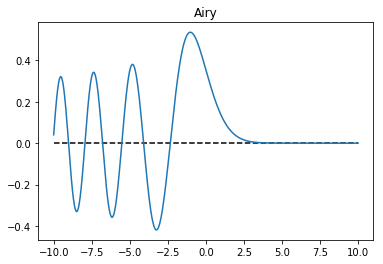

In [98]:
x = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, sp.airy(x)[0])
ax.hlines(0, -10, 10, linestyles = 'dashed')
ax.set_title('Airy')
plt.show()

О константах, таких как масса там или постоянная планка я думать конечно же не хочу, хочу видеть уравние в таком виде:  
$\Psi'' + (E- x)\Psi = 0$  
Понятно, что такого можно добиться банальным выбором нужных размерностей. 
Замена $x = \xi + E$ преобразует к такому виду:  
$\Psi''(\xi + E) - \xi \Psi(\xi + E) = 0$  
Это уравнение можно решать, но мы не будем, оно уже решено до нас. Ответ функция Airy. Мы могли бы написать ее сами, но не будем, потому что ее уже написали. Это уравнение на $x > 0$, с граничным условием $\Psi(x = 0) = 0$ или же $\Psi(\xi = -E) = 0$. О, а это и есть уравниение на спектр энергии. Мы могли бы начать искать корни у Airy каким-нибудь методом ньютона, тем более что знаем производную, но не будем, так как задача уже давно решена

In [99]:
y = sp.ai_zeros(20)[0]
print(-y)

[ 2.33810741  4.08794944  5.52055983  6.78670809  7.94413359  9.02265085
 10.04017434 11.0085243  11.93601556 12.82877675 13.69148904 14.52782995
 15.34075514 16.13268516 16.905634   17.66130011 18.4011326  19.12638047
 19.83812989 20.53733291]


Это и есть наш энергетичесский спектр. Проверим, что нас не обманули

In [100]:
sp.airy(y)[0]

array([-4.44811002e-16, -1.33530560e-16,  3.19114914e-14,  1.38919966e-13,
        7.64713191e-12, -7.45834384e-16, -5.05888379e-15, -1.33699992e-15,
        5.63922477e-16, -1.73562528e-15,  7.73836012e-16, -2.48857126e-15,
       -1.93791552e-15, -3.09364171e-15, -3.98482332e-16,  2.74385428e-15,
       -5.90779994e-16,  1.40538943e-15,  1.54489517e-15, -7.85942324e-16])

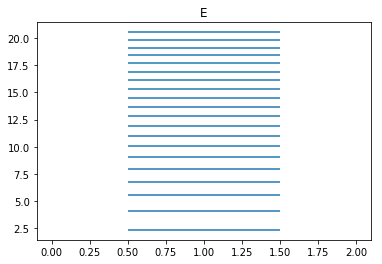

In [102]:
fig, ax = plt.subplots()
ax.eventplot(-y, orientation='vertical')
ax.set_title('E')
plt.show()

Ну как-то сжимается видимо.

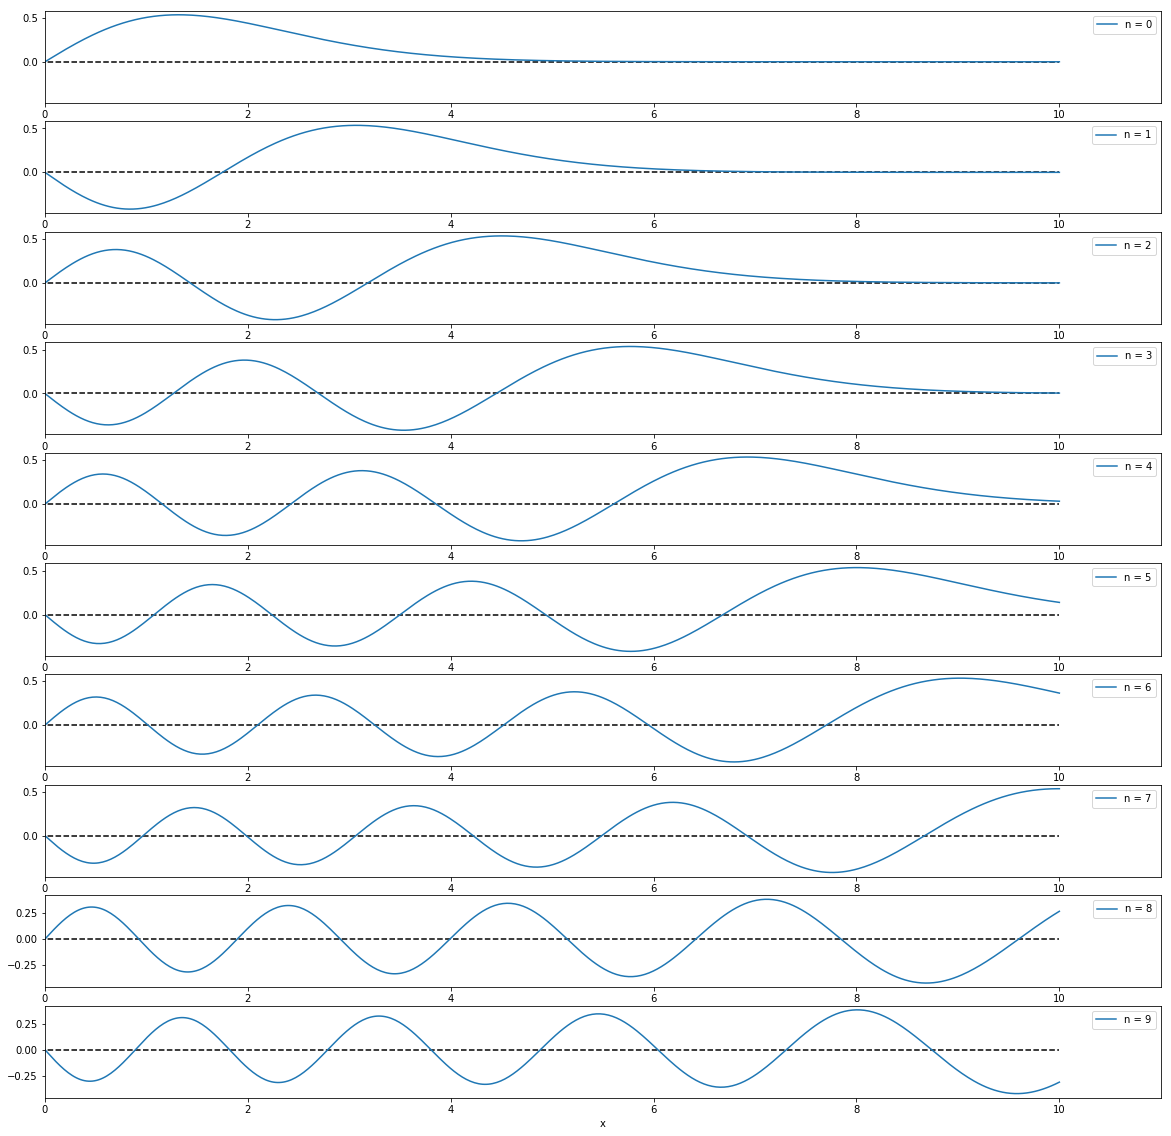

In [103]:
x = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots(nrows = 10, figsize = (20, 20))
for i in range(10):
    st = 'n = ' + str(i)
    ax[i].plot(x, sp.airy(x+y[i])[0], label = st)
    ax[i].hlines(0, -10, 10, linestyles = 'dashed')
    ax[i].set_xlim(left = 0)
    ax[i].set_xlabel('x')
    ax[i].legend()
plt.show()

осцилляторная теорема выполняется, к нулю сходимся и слава богу